In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
housing=pd.read_csv("housing.csv")
housing.head()
# Each row represent the district 
# Total 10 attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.info()
# total_bedrooms has null values: 207 districts miss this value.
# Ocean_proximity is a class label, rest are neumeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing["ocean_proximity"].value_counts()
# 4 categories:INLAND NEAR OCEAN  NEAR BAY ISLAND

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


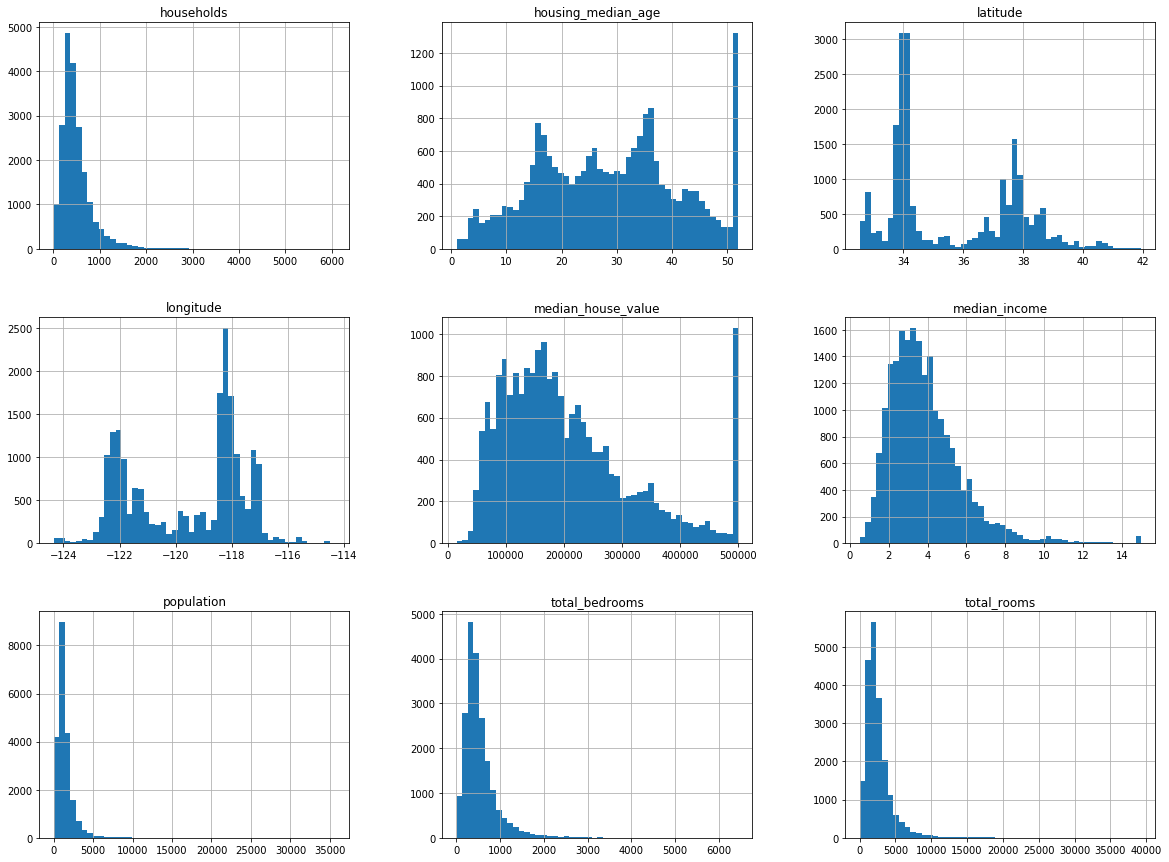

In [16]:
# plotting histogram for all neumeric variables
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [17]:
# Median income is capped b/w 0.5 and 15
# Histograms are heavily tailed
# Splitting train and test data

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [18]:
# Here we did 80-20 split.
train_set,test_set=split_train_test(housing,0.2)
print(len(train_set), "train , " ,len(test_set),"test")

16512 train ,  4128 test


In [19]:
# Better way to split data would be from sci-kit learn instead of above
# Splits data based on indices

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train , " ,len(test_set),"test")

16512 train ,  4128 test


C:\Users\punee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


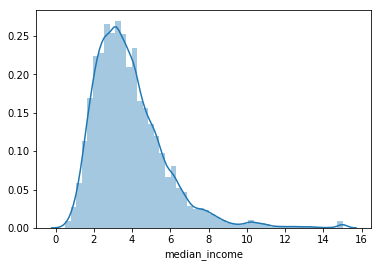

In [20]:
# lets consider median_income closely
sns.distplot(housing.median_income)
# Most of the incomes between 2-6K bust significant are above 6K
# we will implement stratified sampling and need to make sure that we do have our sample with income values greater and 6

In [21]:
# converting median income to categorical income_cat based on income>5
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
# limit no. of income categories [1, 2, 3, 4, 5]
housing["income_cat"].head()

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [22]:
# Creating stratified sample based on income categorty
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
# Let's compare actual, statified and random sample
strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [24]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
# Considering median income as an important parameter (Domain Knowledge), we will keep stratified sample
# Removing income category
strat_train_set.drop(["income_cat"], axis=1)
strat_test_set.drop(["income_cat"], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
20552,-121.80,38.68,11.0,3851.0,892.0,1847.0,747.0,3.4331,120600.0,INLAND
19989,-119.32,36.19,11.0,1281.0,291.0,861.0,313.0,1.0962,72300.0,INLAND
17049,-122.26,37.46,26.0,5067.0,750.0,1996.0,728.0,7.0001,500001.0,NEAR OCEAN
13692,-117.24,34.13,26.0,3774.0,716.0,1913.0,620.0,3.3534,98900.0,INLAND
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND


In [26]:
# Creating copy for visualisation
copy=strat_train_set.copy()

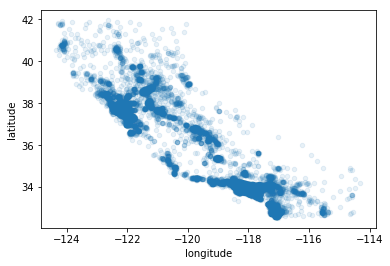

In [27]:
# Lattitude vs Longitude plot
copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# We can cearly see dense regions are more populated (The Bay area as data is from California)


<Figure size 1120x480 with 0 Axes>

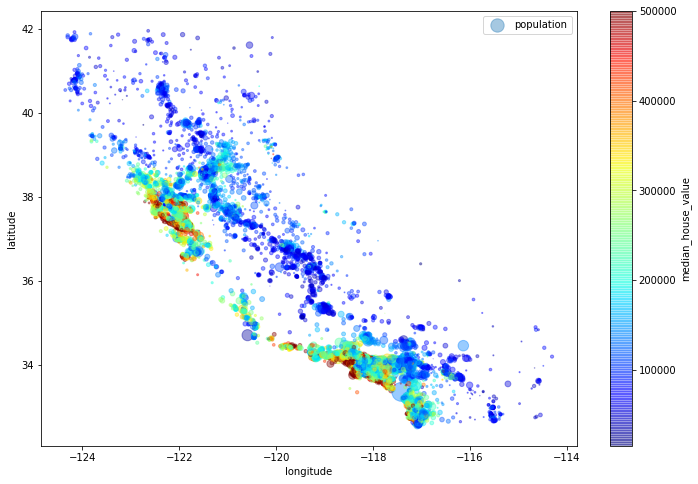

In [28]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
         s=copy["population"]/100, label="population", c="median_house_value",
         cmap=plt.get_cmap("jet"), colorbar=True,sharex=False, figsize=(12,8))
plt.legend()
plt.show()
# Each circle represents distrcit population and colour represnts price
# Proximity to the ocean could have been a factor but northen ocean of california doesn't have much population and prices
# We can clealy see clusters based on population density and hence can leverage that later


In [29]:
# Looking at correlations
corr_mat=copy.corr()
corr_mat["median_house_value"].sort_values(ascending=False)
# Here non linear relations cannot be seen

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

C:\Users\punee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7C882AF98>,
      dtype=object)

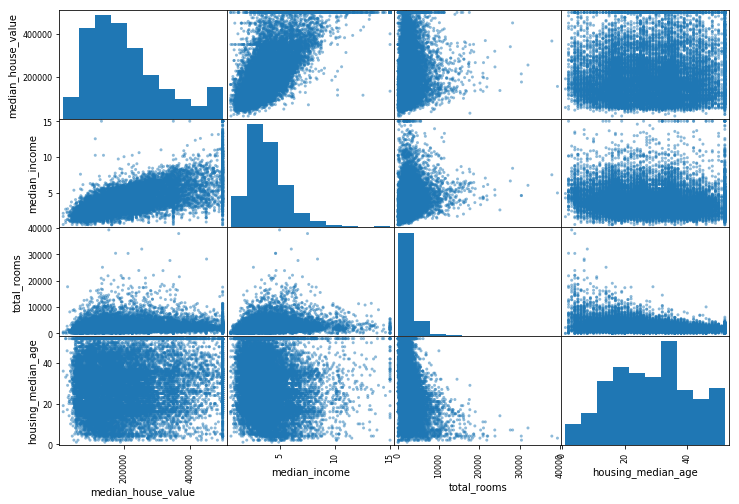

In [30]:
# Visualizing using scatter_matrix
from pandas.tools.plotting import scatter_matrix
attributes= ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(copy[attributes], figsize=(12,8))
# Most linear relationship is for median house value

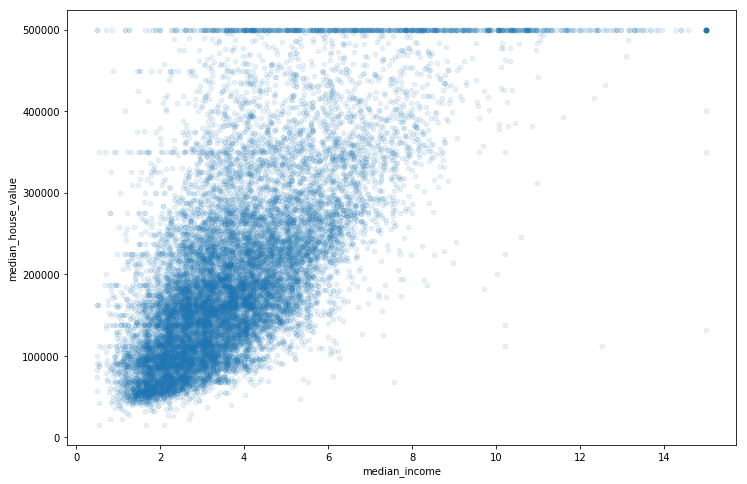

In [31]:
# Zooming in median house value
copy.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(12,8))
# Clear linear relationship but has few quirks(straight lines)

In [32]:
copy.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [33]:
# Total bedrooms and total rooms are nonhousing necessary untill we know the average of rooms in a district
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"]=housing["total_bedrooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [34]:
# Now checking corrlation
corr_mat=housing.corr()
corr_mat["median_house_value"].sort_values(ascending=False)
#rooms_per_household has a very high correlation with median_house_value

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046739
latitude                   -0.144160
Name: median_house_value, dtype: float64

In [35]:
housing.describe()
# Bedroom per household has missing values 20433

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,1.097062,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.476104,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,1.006029,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,1.048889,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,1.099631,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


In [36]:
# Creating missing value imputer to replace missing values
# Initializing imputer
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [37]:
# Median can be computed on neumerical data so lets drop ocean_proximity
housing_num=housing.drop("ocean_proximity", axis=1)
list(housing_num.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'income_cat',
 'rooms_per_household',
 'bedrooms_per_household',
 'population_per_household']

In [38]:
bedrooms_per_household_null=housing_num[housing_num['bedrooms_per_household'].isnull()]
bedrooms_per_household_null.describe()
# We cannot see any pattern in missing values.
# In such case imputation based on mean will be ideal.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,207.000000,207.000000,207.000000,207.000000,0.0,207.000000,207.000000,207.000000,207.000000,207.000000,0.0,207.000000
mean,-119.472560,35.497633,29.270531,2562.603865,NaN,1477.772947,510.024155,3.822244,206007.280193,5.197604,NaN,2.984018
std,2.001424,2.097298,11.964927,1787.269789,NaN,1057.448212,386.120704,1.955595,111638.214545,1.335527,NaN,0.727363
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000,2.096692,NaN,1.317891
25%,-121.810000,33.970000,19.000000,1307.500000,NaN,781.000000,258.000000,2.564150,128750.000000,4.288488,NaN,2.485365
50%,-118.490000,34.200000,30.000000,2155.000000,NaN,1217.000000,427.000000,3.411500,175000.000000,5.093117,NaN,2.858491
75%,-117.985000,37.495000,38.000000,3465.000000,NaN,1889.500000,628.000000,4.615750,267700.000000,6.017981,NaN,3.334081
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000,10.386667,NaN,6.039474


In [39]:
# transform the dataset
bedrooms_per_household_missed=housing_num['bedrooms_per_household']
housing_num['bedrooms_per_household'] =bedrooms_per_household_missed.fillna(bedrooms_per_household_missed.mean())
housing_num.describe()
# bedrooms_per_household missing values replaced by mean.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,1.097062,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.473711,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,1.006536,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,1.049857,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,1.098851,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


In [40]:
# Earlier we skipped categorical variable ocean_proximity. 
# We can convert it into a neumeric 
housing_cat = housing[['ocean_proximity']]

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat_encoded=encoder.fit_transform(housing_cat)
print(housing_cat_encoded)


[3 3 3 ... 1 1 1]


C:\Users\punee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
print(encoder.classes_)
# <1H OCEAN':0 'INLAND':1 'ISLAND':2 'NEAR BAY':3 'NEAR OCEAN':4
# This method is insignificant because 0 and 4 are too distinct which is not the case.
# We will use One Hot Encoding instead of this which will make more sense

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [43]:
housing_cat_encoded=list(housing_cat_encoded)
housing_cat_encoded_array=np.asarray(housing_cat_encoded)
encoded_classes=(encoder.classes_)

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
### integer mapping using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(encoded_classes)
print(integer_encoded)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[0 1 2 3 4]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [45]:
# Mapping encoded values to housing_cat
housing_cat_list=housing_cat.values.tolist()

In [46]:
#['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_hot=encoder.fit_transform(housing_cat)
housing_cat_hot
# housing_cat_hot contains encoded ocean_proximity values

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [47]:
# We will make use of housing_num data for which we replaced missing values
housing_miss_drop=housing_num.drop(['total_bedrooms','total_rooms','income_cat'],axis=1)
housing_miss_drop.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467


In [48]:
# We have all required variables except vector we created for ocean_proximity
# Also we need to standardize our data
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(housing_miss_drop)
std_df=pd.DataFrame(data=std_data,columns=("longitude","latitude","housing_median_age","population","households",
                                          "median_income","median_house_value","rooms_per_household","bedrooms_per_household","population_per_household"))
std_df.describe()
# We have our standardized data

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-6.527810e-15,1.256263e-15,8.557001e-16,-6.465442e-17,2.139358e-16,3.734255e-16,8.950635e-16,2.704111e-16,1.470669e-16,6.064808e-19
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.662641e+00,-1.852319e+00,-1.612266e+00,-2.290000e-01
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-7.561633e-01,-3.994496e-01,-1.911054e-01,-6.171062e-02
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-2.291318e-01,-2.368162e-01,-1.767951e-01,-2.353337e-01,-8.078489e-02,-9.965178e-02,-2.431585e-02
75%,7.784964e-01,9.729566e-01,6.643103e-01,2.644949e-01,2.758427e-01,4.593063e-01,5.014973e-01,2.519615e-01,3.774947e-03,2.037453e-02
max,2.625280e+00,2.958068e+00,1.856182e+00,3.025033e+01,1.460152e+01,5.858286e+00,2.540411e+00,5.516324e+01,6.960032e+01,1.194191e+02


In [73]:
# Converting OHE Data to DataFrame before merging
#['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
housing_cat_hot_df=pd.DataFrame(data=housing_cat_hot,columns=("H_OCEAN","INLAND","ISLAND","NEAR_BAY","NEAR_OCEAN"))
housing_cat_hot_df.describe()
# We have created 5 features based on the category here and now we can merge this with original DF

,H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.442636,0.317393,0.000242,0.110950,0.128779
std,0.496710,0.465473,0.015563,0.314077,0.334963
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# Merging Data Frames
final_df=pd.concat([housing_cat_hot_df,std_df],join='outer', axis=1)
final_df.head()
# This is the final model ready dataset

,H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
0,0,0,0,1,0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.154640,-0.049597
1,0,0,0,1,0,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,1.314156,0.327041,-0.264265,-0.092512
2,0,0,0,1,0,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.049855,-0.025843
3,0,0,0,1,0,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050671,-0.050329
4,0,0,0,1,0,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.033737,-0.085616


In [75]:
# Getting a train-test split
# We had done a stratified sample earlier based on bucket size of median income.
income_bucket=housing['income_cat']
income_bucket=income_bucket.to_frame()
final_df_bucket=pd.concat([income_bucket,final_df],join='outer', axis=1)

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(final_df_bucket, final_df_bucket["income_cat"]):
    strat_train_set = final_df_bucket.loc[train_index]
    strat_test_set = final_df_bucket.loc[test_index]
strat_train_set.head()
# We have our train and test sets from which we must drop income_cat

,income_cat,H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
17606,2,1,0,0,0,0,-1.158131,0.776318,0.743768,-0.631804,-0.419909,-0.614005,0.691067,-0.324816,-0.130176,-0.094000
18632,5,1,0,0,0,0,-1.178096,0.663953,-1.163225,-0.988557,-1.011036,1.342647,1.159034,0.234367,-0.298312,-0.034922
14650,2,0,0,0,0,1,1.182792,-1.339885,0.187562,-0.432234,-0.098189,-0.530890,-0.086278,-0.486595,-0.163779,-0.100587
3230,2,0,1,0,0,0,-0.020113,0.317495,-0.289187,0.030486,-0.383290,-1.045792,-1.391385,-0.079505,-0.097258,0.102575
3555,3,1,0,0,0,0,0.489001,-0.656333,-0.924851,2.678762,2.520033,-0.440037,0.412887,-0.373140,-0.115440,-0.002196


In [77]:
strat_train_set=strat_train_set.drop(['income_cat'],axis=1)
strat_test_set=strat_test_set.drop(['income_cat'],axis=1)
strat_test_set.head()
# we will never see test set after this and will only work on train set.

,H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
5241,1,0,0,0,0,0.588827,-0.707833,0.028646,0.669816,1.204383,2.321816,2.540411,0.520035,-0.090555,-0.076610
10970,1,0,0,0,0,0.853366,-0.871699,0.823227,0.215044,0.396161,0.389745,0.289829,0.387870,-0.191932,-0.048808
20351,1,0,0,0,0,0.259400,-0.665696,-0.130270,0.604470,0.984672,-0.452038,0.098309,-0.184008,-0.084410,-0.063739
6568,0,1,0,0,0,0.708618,-0.670378,1.856182,-0.359824,-0.464374,0.147980,-0.214535,0.047526,-0.309800,0.008746
13285,0,1,0,0,0,0.943210,-0.731243,0.267020,-0.316554,-0.516686,0.087815,-0.741431,0.181270,-0.121020,0.044528


In [78]:
# Removing median_house_value and splitting a CV data
strat_test_label=strat_test_set['median_house_value']
strat_train_label=strat_train_set['median_house_value']
strat_train_set=strat_train_set.drop(['median_house_value'], axis=1)
strat_test_set=strat_test_set.drop(['median_house_value'], axis=1)
strat_test_label.head()

5241     2.540411
10970    0.289829
20351    0.098309
6568    -0.214535
13285   -0.741431
Name: median_house_value, dtype: float64

In [79]:
# Implementing CV
train_df,train_cv,train_label,label_cv=train_test_split(strat_train_set,strat_train_label,test_size=0.1, random_state=42)
train_df.describe()
# 14860 Points for train data and 1653 points for CV

,H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
count,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000,14860.000000
mean,0.441386,0.316622,0.000135,0.112651,0.129206,-0.005090,0.004095,0.004316,-0.002042,-0.003216,0.002707,-0.000873,-0.002391,0.003650
std,0.496569,0.465174,0.011601,0.316177,0.335439,0.999578,1.003213,0.999338,0.995906,0.991395,1.004291,0.978054,0.919068,1.173793
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.385992,-1.447568,-2.196180,-1.256123,-1.301368,-1.774299,-1.737416,-1.260426,-0.229000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-1.113209,-0.792107,-0.845393,-0.566679,-0.576845,-0.688119,-0.400403,-0.191626,-0.061796
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.523940,-0.642287,0.028646,-0.230898,-0.239432,-0.171637,-0.080604,-0.100261,-0.024360
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.773505,0.977638,0.664310,0.260963,0.270611,0.459741,0.252889,0.001773,0.020320
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.625280,2.958068,1.856182,30.250330,12.707821,5.858286,55.163236,51.803571,119.419103


In [57]:
# Another approach for CV can be using corss_val_score
# Also let's implement our first model i.e decision tree regressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
# Take all parameters as default

In [58]:
# CV with 10 folds
scores=cross_val_score(tree_reg,strat_train_set,strat_train_label,
                       scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
print("Mean Score: ", scores.mean())
print("rmse_scores: ", rmse_scores)
print("Standard Deviation: ", scores.std())
# This would be our performance measure with DT Regressors.

Mean Score:  -0.3783126333506799
rmse_scores:  [0.60322052 0.59934343 0.60502638 0.61792378 0.60584756 0.64897751
 0.6158725  0.59417489 0.65521934 0.60189192]
Standard Deviation:  0.02489430000195611


In [59]:
# Let's try Linear Regression with same technique
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
scores=cross_val_score(lin_reg,strat_train_set,strat_train_label,
                       scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
print("Mean Score: ", scores.mean())
print("rmse_scores: ", rmse_scores)
print("Standard Deviation: ", scores.std())
# Entire code is same except our regressor
# Notice that our Linear Regression is performing slightly better than our Decision Tree Regressor Model.

Mean Score:  -0.3605997991389944
rmse_scores:  [0.58243496 0.58386469 0.58950321 0.64790192 0.60431828 0.61912242
 0.56377693 0.59443086 0.62633724 0.58870592]
Standard Deviation:  0.028525644429582057


In [65]:
# Lets do Random Forest and then we will move to model Tuning part
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg= RandomForestRegressor()
scores=cross_val_score(forest_reg,strat_train_set,strat_train_label,
                       scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
print("Mean Score: ", scores.mean())
print("rmse_scores: ", rmse_scores)
print("Standard Deviation: ", scores.std())
# Entire code is same except our regressor
# This is much much better than our previous 2 models.

Mean Score:  -0.20643586447178577
rmse_scores:  [0.44472523 0.42729654 0.45079806 0.48526904 0.4514434  0.48283229
 0.44099605 0.43994903 0.47086804 0.44566052]
Standard Deviation:  0.01679624607887119


In [61]:
# Let's see the actual score values
print(scores)

[-0.20020269 -0.18793107 -0.20623195 -0.22268972 -0.20650035 -0.24329807
 -0.19767217 -0.19379103 -0.22506991 -0.21237859]


In [62]:
# Function to find actual values
def actual_dev(model_scores,data):
    actual_scores=[]
    data_mean=np.mean(data)
    data_dev=np.std(data)
    for i in model_scores:
        x=(i*data_dev)+data_mean
        actual_scores.append(x)  
    print("Scores: ", actual_scores)
    print("Mean: ", np.mean(actual_scores))
    print("Standard Deviation: ", np.std(actual_scores))

In [63]:
# Lets try this on random forest
data_median_house_value=housing_num['median_house_value']
actual_dev(scores,data_median_house_value)
# Note that we will not use this function for performance measure
# The data for this function includes entire median_house_values rather than just test 
# This is just for self learning. We will measure model performance on standardized data only.


Scores:  [183753.86355096818, 185169.92104140788, 183058.13079584233, 181159.0224533687, 183027.1593776086, 178780.96634729108, 184045.86714038573, 184493.7230335573, 180884.36472521655, 182348.85195249956]
Mean:  182672.18704181458
Standard Deviation:  1833.5966652178058


In [80]:
# Implementing XGBoost
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

In [81]:
scores=cross_val_score(xgb_reg,strat_train_set,strat_train_label,
                       scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
print("Mean Score: ", scores.mean())
print("rmse_scores: ", rmse_scores)
print("Standard Deviation: ", scores.std())
# This is even better than Random Forest

Mean Score:  -0.16869364194039418
rmse_scores:  [0.4079477  0.401232   0.4042113  0.41460017 0.40360372 0.44211358
 0.39399884 0.39959008 0.43477247 0.40243396]
Standard Deviation:  0.012548487561844027


In [82]:
actual_dev(scores,data_median_house_value)
# We will move forward with Random Forest and XGBoost Regressor.

Scores:  [187651.99061555922, 188279.05966269097, 188002.1558349001, 187020.56382912857, 188058.79214505397, 184300.62627724375, 188942.80227215297, 188430.78768556763, 185043.4463400276, 188167.59314937115]
Mean:  187389.78178116961
Standard Deviation:  1448.0053715672188


In [86]:
# Parameter tuning of RF with Grid Search
from sklearn.model_selection import GridSearchCV
param_grid= [{'n_estimators': [20,30,40,50], 'max_features': [2,4,6,8]}, 
             {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},]

In [87]:
grid_search=GridSearchCV(forest_reg, param_grid,cv=5, scoring='neg_mean_squared_error')
grid_search.fit(strat_train_set,strat_train_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [20, 30, 40, 50], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [88]:
grid_search.best_params_
# Here are best parameters for our RF model.
# We can further increase n_estimators as we have highest value.

{'max_features': 4, 'n_estimators': 50}

In [89]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
# 0.4225517076055316 {'max_features': 4, 'n_estimators': 50} is the best value

0.44801371032597526 {'max_features': 2, 'n_estimators': 20}
0.43955631045038357 {'max_features': 2, 'n_estimators': 30}
0.4366728854479507 {'max_features': 2, 'n_estimators': 40}
0.4346293036532074 {'max_features': 2, 'n_estimators': 50}
0.43072493434671594 {'max_features': 4, 'n_estimators': 20}
0.42808201451186 {'max_features': 4, 'n_estimators': 30}
0.4274607497838097 {'max_features': 4, 'n_estimators': 40}
0.4225517076055316 {'max_features': 4, 'n_estimators': 50}
0.43318762652441906 {'max_features': 6, 'n_estimators': 20}
0.4324068595254817 {'max_features': 6, 'n_estimators': 30}
0.4245646086801824 {'max_features': 6, 'n_estimators': 40}
0.42544051969215013 {'max_features': 6, 'n_estimators': 50}
0.4360745904940485 {'max_features': 8, 'n_estimators': 20}
0.43243013821410037 {'max_features': 8, 'n_estimators': 30}
0.4284433668525566 {'max_features': 8, 'n_estimators': 40}
0.42659651199770326 {'max_features': 8, 'n_estimators': 50}
0.5216714257149042 {'bootstrap': False, 'max_featur

In [91]:
# Analysing best features for our final model
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([1.95064573e-02, 1.53679153e-01, 8.88347834e-05, 4.35613775e-03,
       8.70194947e-03, 9.47032522e-02, 8.54164101e-02, 4.48239173e-02,
       2.65314873e-02, 2.76606923e-02, 3.01443935e-01, 1.00424787e-01,
       2.97925419e-02, 1.02870446e-01])

In [1]:
# Displaying importance with their features
column_names=list(strat_train_set.columns)
sorted(zip(feature_importances,column_names),reverse=True)
# We can see only one ocean proximity feature is important.

NameError: name 'strat_train_set' is not defined

In [96]:
# Lets drop last 4 features from our train and test data
strat_train_final=strat_train_set.drop(['H_OCEAN','NEAR_OCEAN','NEAR_BAY','ISLAND'], axis=1)
strat_test_final=strat_test_set.drop(['H_OCEAN','NEAR_OCEAN','NEAR_BAY','ISLAND'], axis=1)

In [ ]:
# Final model on test data
final_model_rf=grid_search.best_estimator_
final_predictions_rf=final_model_rf.predict(strat_test_final)

In [ ]:
final_mse_rf=mean_squared_error(strat_test_label,final_predictions_rf)
final_rmse_rf=np.sqrt(final_mse)
print(final_mse_rf)
print(final_rmse_rf)

In [ ]:
# Training for XGBoost
grid_search=GridSearchCV(xgb_reg, param_grid,cv=5, scoring='neg_mean_squared_error')
grid_search.fit(strat_train_set,strat_train_label)

In [ ]:
final_predictions_xgb=grid_search.best_params_
final_predictions_xgb=final_model_rf.predict(strat_test_final)

In [ ]:
final_mse_xgb=mean_squared_error(strat_test_label,final_predictions_xgb)
final_rmse_xgb=np.sqrt(final_mse)
print(final_mse_xgb)
print(final_rmse_xgb)